# Walmart Sales

In [18]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path 
import plotly.express as px

## Loading and Preprocessing Walmart Sales Encoded Data

In [19]:
# Load the CSV file
walmart_sales_csv = Path("walmart_sales.csv")
walmart_sales_csv = pd.read_csv("walmart_sales.csv")
walmart_sales_csv.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
# Show Dataset Structure
walmart_sales_csv.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
# Check for missing values
walmart_sales_csv.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [22]:
# Summary Statistics
walmart_sales_csv.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [23]:
# Check for duplicates
walmart_sales_csv.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [29]:
# Convert 'Date' to datetime 
walmart_sales_csv['Date'] = pd.to_datetime(walmart_sales_csv['Date'], format='%d-%m-%Y')


In [30]:
# Check the Holiday_Flag columns
print(walmart_sales_csv['Holiday_Flag'].value_counts())


Holiday_Flag
0    5985
1     450
Name: count, dtype: int64


# Visualization

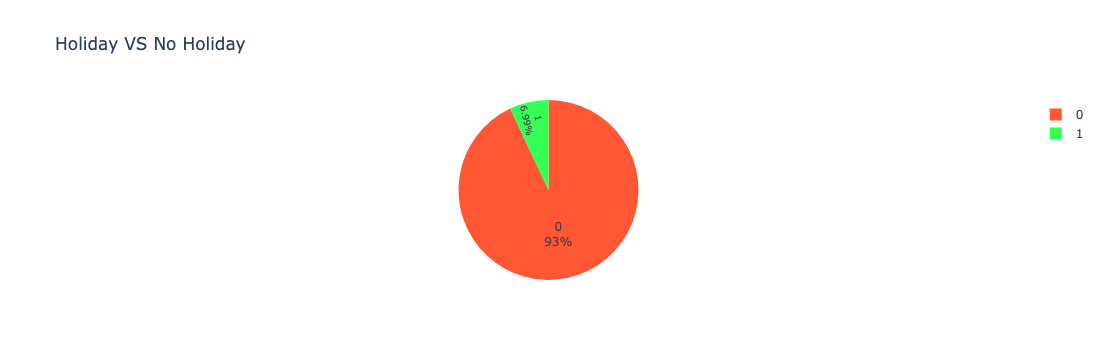

In [31]:
# Define custom colors for holiday flag
custom_colors = ['#FF5733', '#33FF57']  
# Create a pie chart for Holiday_Flag with custom colors
fig = px.pie(
    walmart_sales_csv,
    names='Holiday_Flag', # column that contain holiday status (1 for holiday 0 for no holiday)
    title='Holiday VS No Holiday',
    color_discrete_sequence=custom_colors) 

# Customize the layout
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the pie chart
fig.show()
    


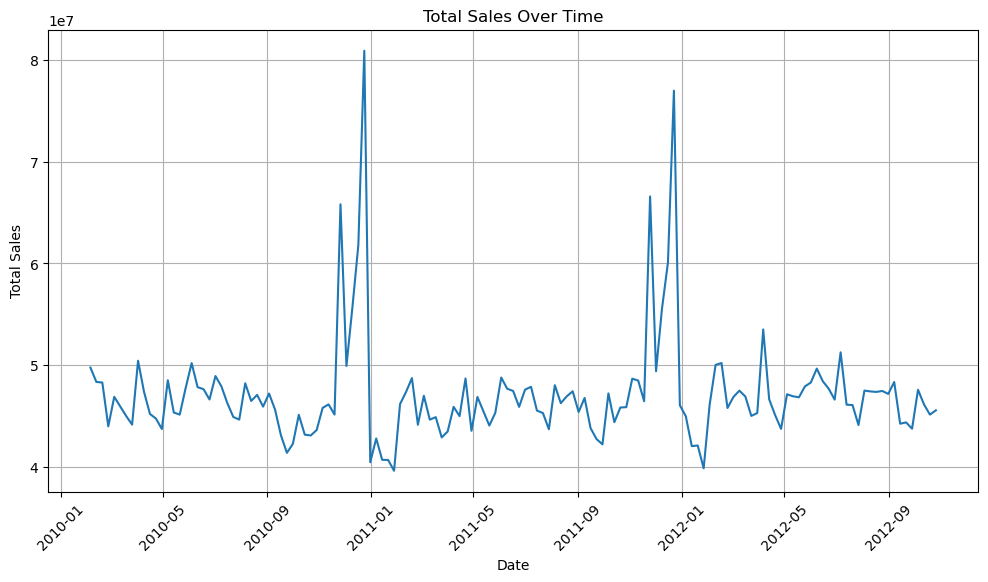

In [33]:
# Group by date and sum sales
daily_sales = walmart_sales_csv.groupby('Date')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

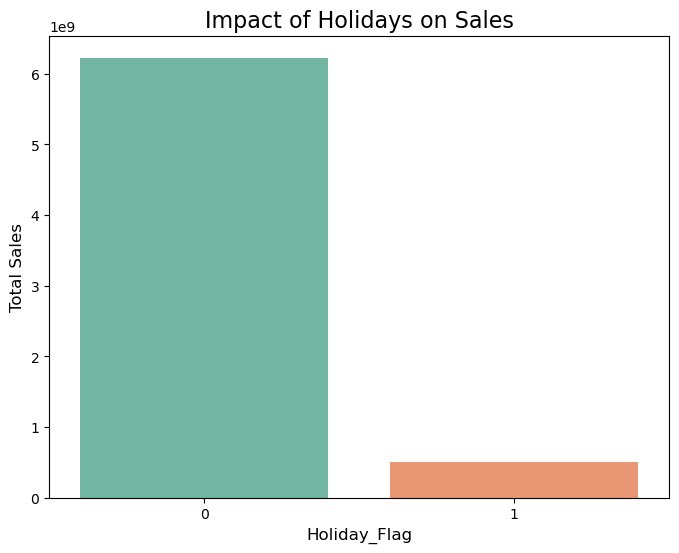

In [35]:
# Holidays Impact on Sales
holiday_sales = walmart_sales_csv.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

# Create a bar plot to compare sales during holidays and non-holidays
plt.figure(figsize=(8,6))
sns.barplot(data=holiday_sales, x='Holiday_Flag', y='Weekly_Sales', palette='Set2')
plt.title('Impact of Holidays on Sales', fontsize=16)
plt.xlabel('Holiday_Flag', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()